<a href="https://colab.research.google.com/github/sachi9004/sachchidanand-kumar/blob/master/Project1_BDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv('/content/cereals.CSV')
data.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [5]:
data.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705,0.961039,0.077922,0.103896,0.298701,0.285714,0.103896,0.012987
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289,0.194771,0.269807,0.307127,0.460690,0.454716,0.307127,0.113961
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X=data.drop(columns=['Name','Rating'])

In [7]:
X.head()

,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,1,1,0,0,0,0,0
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,1,0,1,0,0,0,0
2,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,1,0,0,1,0,0,0
3,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,1,0,0,1,0,0,0
4,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,1,0,0,0,0,1,0


In [9]:
X.isna().head()

,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [10]:
X.isna().sum()

Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           1
Sugars          1
Potass          2
Vitamins        0
Shelf           0
Weight          0
Cups            0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

In [0]:
X.fillna(X.mean(),inplace=True)

In [12]:
X.isna().sum()

Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           0
Sugars          0
Potass          0
Vitamins        0
Shelf           0
Weight          0
Cups            0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 21 columns):
Manuf           77 non-null object
Type            77 non-null object
Calories        77 non-null int64
Protein         77 non-null int64
Fat             77 non-null int64
Sodium          77 non-null int64
Fiber           77 non-null float64
Carbo           77 non-null float64
Sugars          77 non-null float64
Potass          77 non-null float64
Vitamins        77 non-null int64
Shelf           77 non-null int64
Weight          77 non-null float64
Cups            77 non-null float64
Cold            77 non-null int64
Nabisco         77 non-null int64
Quaker          77 non-null int64
Kelloggs        77 non-null int64
GeneralMills    77 non-null int64
Ralston         77 non-null int64
AHFP            77 non-null int64
dtypes: float64(6), int64(13), object(2)
memory usage: 12.8+ KB


We can see there are 2 variables of non-numeric type , we need to convert it numeric type using Label Encoding.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
labelEncoder = LabelEncoder()
labelEncoder.fit(X['Manuf'])
X['Manuf'] = labelEncoder.transform(X['Manuf'])

In [0]:
labelEncoder = LabelEncoder()
labelEncoder.fit(X['Type'])
X['Type'] = labelEncoder.transform(X['Type'])

In [24]:
X.head()

,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,3,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,1,1,0,0,0,0,0
1,5,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,1,0,1,0,0,0,0
2,2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,1,0,0,1,0,0,0
3,2,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,1,0,0,1,0,0,0
4,6,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,1,0,0,0,0,1,0


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 21 columns):
Manuf           77 non-null int64
Type            77 non-null int64
Calories        77 non-null int64
Protein         77 non-null int64
Fat             77 non-null int64
Sodium          77 non-null int64
Fiber           77 non-null float64
Carbo           77 non-null float64
Sugars          77 non-null float64
Potass          77 non-null float64
Vitamins        77 non-null int64
Shelf           77 non-null int64
Weight          77 non-null float64
Cups            77 non-null float64
Cold            77 non-null int64
Nabisco         77 non-null int64
Quaker          77 non-null int64
Kelloggs        77 non-null int64
GeneralMills    77 non-null int64
Ralston         77 non-null int64
AHFP            77 non-null int64
dtypes: float64(6), int64(15)
memory usage: 12.8 KB


In [27]:
# standardizing the data
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
data_scaled = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.013892,0.000258,0.491033,0.011669,0.004367,0.628300,0.008957,0.069550,0.031851,0.421835,0.117819,0.010595,0.004723,0.004013,0.004542,0.000486,0.000808,0.001301,0.001152,0.000397,0.000092
std,0.013969,0.001294,0.144438,0.005954,0.004787,0.286720,0.008117,0.031720,0.024256,0.236247,0.084471,0.007468,0.001361,0.002554,0.002476,0.001739,0.002899,0.002159,0.001863,0.001177,0.000807
min,0.000000,0.000000,0.137664,0.003271,0.000000,0.000000,0.000000,0.015731,0.000000,0.082294,0.000000,0.003040,0.002386,0.000787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004543,0.000000,0.390637,0.007918,0.000000,0.548371,0.002830,0.052456,0.011878,0.181578,0.083715,0.006676,0.003852,0.002594,0.003484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.008684,0.000000,0.477246,0.010545,0.003834,0.727064,0.007451,0.064370,0.029805,0.402219,0.100802,0.010046,0.004394,0.003441,0.004032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019811,0.000000,0.594329,0.014607,0.007030,0.828285,0.013945,0.076675,0.044003,0.636237,0.123106,0.012444,0.005484,0.004529,0.004857,0.000000,0.000000,0.002922,0.003271,0.000000,0.000000
max,0.092336,0.007082,0.923357,0.033382,0.027502,0.933984,0.038546,0.240073,0.124057,0.908580,0.426603,0.055401,0.009234,0.018467,0.018467,0.007979,0.018467,0.007152,0.005482,0.004322,0.007082


In [39]:
pd.DataFrame(data_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.009439,0.0,0.220235,0.012585,0.003146,0.409007,0.031462,0.015731,0.018877,0.880938,0.078655,0.009439,0.003146,0.001038,0.003146,0.003146,0.0000,0.000000,0.0,0.000000,0.0
1,0.027502,0.0,0.660038,0.016501,0.027502,0.082505,0.011001,0.044003,0.044003,0.742543,0.000000,0.016501,0.005500,0.005500,0.005500,0.000000,0.0055,0.000000,0.0,0.000000,0.0
2,0.004771,0.0,0.166992,0.009542,0.002386,0.620256,0.021470,0.016699,0.011928,0.763393,0.059640,0.007157,0.002386,0.000787,0.002386,0.000000,0.0000,0.002386,0.0,0.000000,0.0
3,0.005507,0.0,0.137664,0.011013,0.000000,0.385458,0.038546,0.022026,0.000000,0.908580,0.068832,0.008260,0.002753,0.001377,0.002753,0.000000,0.0000,0.002753,0.0,0.000000,0.0
4,0.023947,0.0,0.439026,0.007982,0.007982,0.798229,0.003991,0.055876,0.031929,0.393793,0.099779,0.011973,0.003991,0.002993,0.003991,0.000000,0.0000,0.000000,0.0,0.003991,0.0


In [40]:
# defining the kmeans function with initialization as k-means
kmeans = KMeans(n_clusters=5)

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
# inertia on the fitted data
kmeans.inertia_

2.278044088529179

Text(0, 0.5, 'Inertia')

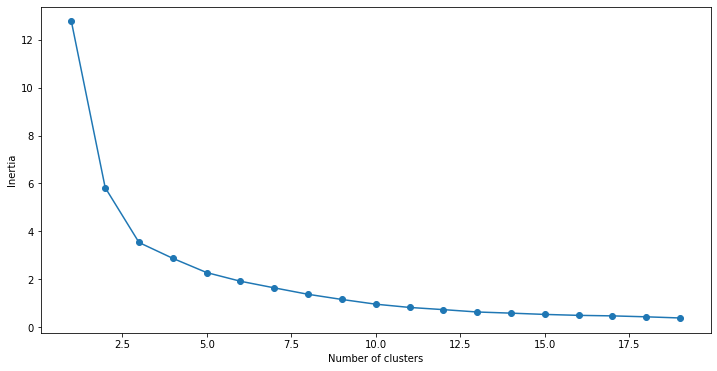

In [42]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [0]:
# k means using 5 clusters and k-means initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [44]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    26
4    20
2    15
0    11
3     5
Name: cluster, dtype: int64

The cereals data set has been normalised and analysed as shown above.
1. All the variables, except name and rating was run using K-Means algorithm with K=5 and following clustures were identified within the data:
a. So,There are 11 data points in cluster 1 (index 0)
b. 26 datapoints for cluster 2
c. 15 datapoints for cluster 3
d. 5 datapoints for cluster 4
e. 20 datapoints for cluster 5.


Now , we will check it with K=3


In [0]:
# k means using 3 clusters and k-means initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [46]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    45
1    20
2    12
Name: cluster, dtype: int64

In this clustering we get the following clusters:
a. 45 data points for cluster 1 (index 0)
b. 20 data points for cluster 2 (index 1)
c. 12 data points fro cluster 3 (index 2)